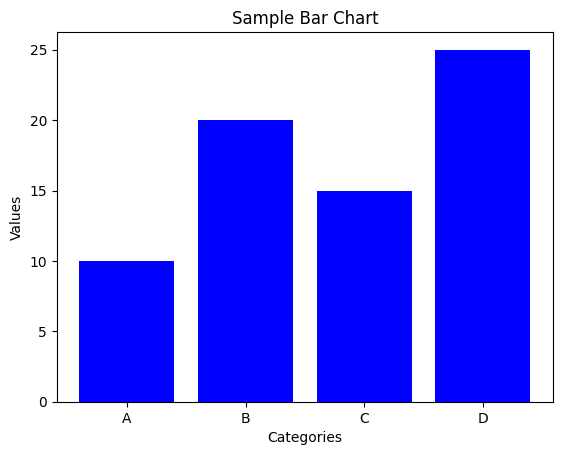

In [1]:
import matplotlib.pyplot as plt

# Sample Data
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 25]

# Create Bar Chart
plt.bar(categories, values, color='blue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Save the chart as an image
plt.savefig('chart.png')  # Saves as chart.png in the same folder

# Optional: Show the chart
# plt.show()


In [2]:
import requests
import json
! pip install geopandas
from requests.structures import CaseInsensitiveDict
import geopandas as gpd
from shapely.geometry import LineString
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
#! pip install folium
import folium

In [3]:
slat = 12.899   # rahul 12.965, 77.596
slong = 77.592   # Soumen 12.919, 77.609
dlat = 12.887     # Mirjan [12.898, 77.651]
dlong = 77.577    # Naryan 12.899, 77.592

master_gdf = gpd.GeoDataFrame()


input_data= {'Narayan': '12.965, 77.596', 'Soumen' : '12.919, 77.609', 'Mirjan' : '12.898, 77.651', 'Rahul' : '12.965, 77.596'}

for name in list(input_data.keys()):
    dlat, dlong  = float(input_data.get(f'{name}').split(',')[0]), float(input_data.get(f'{name}').split(',')[1])

    url = "https://api.geoapify.com/v1/routing?waypoints="+str(slat)+'%2C'+str(slong)+'%7C'+str(dlat)+'%2C'+str(dlong)+"&mode=drive&apiKey=b915bae6e8e043debda3bf585c2e61a6"
    headers = CaseInsensitiveDict()
    headers["Accept"] = "application/json"
    resp = requests.get(url, headers=headers)
    data = resp.json ()
    # Handel the dataframe
    geom = LineString(tuple(data['features'][0]["geometry"]["coordinates"][0]))
    gdf= gpd.GeoDataFrame([name], geometry = [geom], crs = 'EPSG:4326')
    gdf.rename(columns = {0:'New'}, inplace = True)

    master_gdf = pd.concat([master_gdf, gdf], ignore_index = True)

In [4]:
color_mapping = {
    'Narayan': 'red',
    'Soumen': 'blue',
    'Mirjan': 'green',
    'Rahul': 'purple'
}

# Add a new color column based on the mapping
master_gdf['color'] = master_gdf['New'].map(color_mapping)

# # Use the color column in .explore()
master_gdf.explore(color=master_gdf['color'])

In [7]:
from shapely.geometry import Point
master_gdf['start_point'] = master_gdf['geometry'].apply(lambda x: Point(x.coords[0]))
master_gdf['end_point'] = master_gdf['geometry'].apply(lambda x: Point(x.coords[-1]))
master_gdf

,New,geometry,color,start_point,end_point
0,Narayan,"LINESTRING (77.59185 12.89913, 77.59222 12.899...",red,POINT (77.59185 12.89913),POINT (77.59598 12.96500)
1,Soumen,"LINESTRING (77.59185 12.89913, 77.59222 12.899...",blue,POINT (77.59185 12.89913),POINT (77.60902 12.91918)
2,Mirjan,"LINESTRING (77.59185 12.89913, 77.59222 12.899...",green,POINT (77.59185 12.89913),POINT (77.65120 12.89798)
3,Rahul,"LINESTRING (77.59185 12.89913, 77.59222 12.899...",purple,POINT (77.59185 12.89913),POINT (77.59598 12.96500)


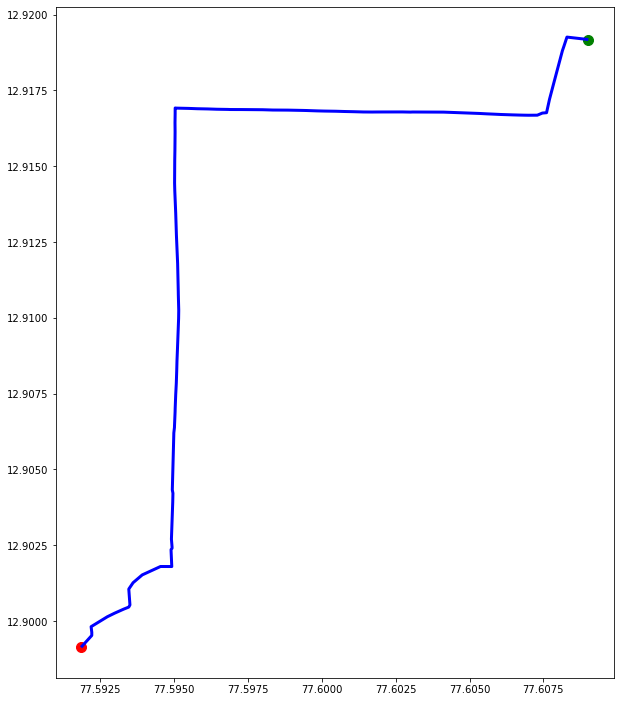

In [10]:
# Extract start and end points
gdf = master_gdf[1:2]
gdf['start_point'] = gdf['geometry'].apply(lambda x: Point(x.coords[-1]))
gdf['end_point'] = gdf['geometry'].apply(lambda x: Point(x.coords[0]))

# Create a plot using matplotlib

fig, (ax2) = plt.subplots( figsize=(10, 15))


# Plot the lines (blue)
gdf.plot(ax=ax2, color='blue', linewidth=3)

# Plot the start points (green circles)
gdf.set_geometry('start_point').plot(ax=ax2, color='green', marker='o', markersize=100)

# Plot the end points (red crosses)
gdf.set_geometry('end_point').plot(ax=ax2, color='red', marker='o', markersize=100)

# Show the plot
plt.show()

# Sample Bar Chart

This is a sample bar chart generated using Matplotlib:

![Bar Chart](chart.png)


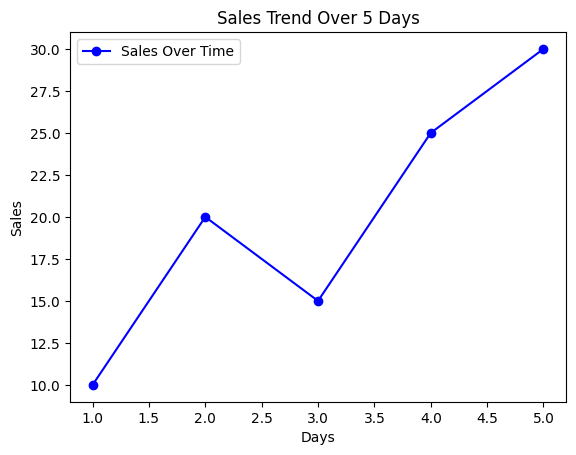

In [2]:
import matplotlib.pyplot as plt

# Sample Data
x = [1, 2, 3, 4, 5]  # X-axis values (e.g., Days)
y = [10, 20, 15, 25, 30]  # Y-axis values (e.g., Sales)

# Create Line Graph
plt.plot(x, y, marker='o', linestyle='-', color='blue', label="Sales Over Time")

# Labels & Title
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales Trend Over 5 Days')
plt.legend()  # Show legend

# Save the graph as an image
plt.savefig('line_graph.png')  # Saves as 'line_graph.png' in the same folder

# Show the plot (optional)
# plt.show()
